In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils.object_detection import non_max_suppression

# HOG Descriptor :

The Histogram of Oriented Gradients (HOG) descriptor is a technique used in computer vision to detect objects with varying shapes and appearances, such as pedestrians. It works by calculating gradient magnitudes and orientations in localized image regions, constructing histograms of gradient orientations, normalizing these histograms, and forming a descriptor vector.

 It involves sliding a window over an image, computing the HOG descriptor for each window position, and using a classifier to identify objects based on the descriptor. 

In [2]:
HOGCV = cv2.HOGDescriptor()                                              #initializing HOG Descriptor
HOGCV.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())       #HOG for people detector

In [3]:
def Detector(frame):
    rects, weights = HOGCV.detectMultiScale(frame, winStride=(4, 4), padding=(8, 8), scale=1.03)  #sliding window
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
    c = 1
    for x, y, w, h in pick:
        cv2.rectangle(frame, (x, y), (w, h), (139, 34, 104), 2)
        cv2.rectangle(frame, (x, y - 20), (w, y), (139, 34, 104), -1)
        cv2.putText(frame, f'P{c}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        c += 1

    cv2.putText(frame, f'Total Persons : {c - 1}', (20, 450), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255, 255, 255), 2)
    return frame

True

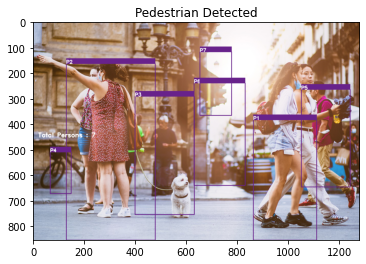

In [6]:
image_path = r'C:\Users\DELL\Desktop\python project\open cv2\New folder (9)\walking.jpg'  # image path
image = cv2.imread(image_path)
output_image = Detector(image)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title("Pedestrian Detected")
cv2.imwrite('Pedestrian_Detetced.png', output_image)